1.List down all possible dimensionality reduction techniques that can be implemented using python.


#Missing Value Ratio
#Low Variance Filter
#High Correlation Filter
#Random Forest
#Backward Feature Elimination
#Forward Feature Selection
#Factor Analysis
#Principal Component Analysis
#Independent Component Analysis
#Methods Based on Projections
#t-Distributed Stochastic Neighbor Embedding (t-SNE)
#UMAP

2. So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data [images and video] and
text data ? Please illustrate your findings using a simple implementation on python.

In multimedia information retrieval, multimedia data such as images and videos are represented as vectors in high-dimensional space. To search these vectors efficiently, a variety of indexing methods have been proposed. However, the performance of these indexing methods degrades dramatically with increasing dimensionality, which is known as the dimensionality curse. To resolve the dimensionality curse, dimensionality reduction methods have been proposed. They map feature vectors in high-dimensional space into vectors in low-dimensional space before the data are indexed. 

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
digits = datasets.load_digits()

In [3]:
X = digits.data
y = digits.target

In [4]:
X.shape

(1797, 64)

In [5]:
y.shape

(1797,)

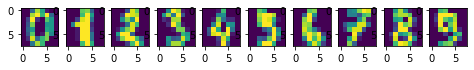

In [6]:
plt.figure(figsize=(8, 8))

for i in range(10):
    
    plt.subplot(1, 10, i + 1)
    
    plt.imshow(X[i,:].reshape([8,8]))

plt.show()

In [7]:
sc = StandardScaler()
X_centered = sc.fit_transform(X)

In [8]:
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_centered)

In [9]:
X_pca.shape

(1797, 6)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state= 1 )

clf = svm.SVC(gamma=0.21)


In [11]:
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

In [12]:
accuracy_score(y_test, predicted)

0.9

In [13]:
pd.crosstab(y_test, predicted)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,57,0,0,0,2,0,0,0,0,0
1,0,46,1,0,2,0,0,0,0,0
2,0,1,42,1,0,0,0,1,3,1
3,0,0,2,50,0,0,0,2,4,6
4,0,0,0,0,61,0,0,0,0,0
5,0,0,0,0,0,43,0,0,4,0
6,0,0,0,0,0,0,51,0,0,0
7,0,1,0,0,1,0,0,54,1,0
8,0,2,2,2,1,1,0,0,37,1


----- END-------